In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gamma
%matplotlib inline

In [5]:
plt.style.use("ggplot")
np.random.seed(123)
accept_dict = {}

In [8]:
# .2次元
NMCS = 40000

Ndim = 2
accept = 0
for i in range(NMCS):
    # xの座標を取得
    x = 2 * np.random.rand(Ndim) - 1.0
    # N次元のxの原点からの距離を計算
    # 全部のベクトルを2乗して和を取ってルートを取る
    r = (np.sum(x**2)) ** 0.5
    # 取得した点の距離が原点から1以下かを判定
    if r <= 1:
        # 1以下の場合は受領
        accept +=1
accept_ratio = accept / NMCS

# 解析解（超格子の体積）
analytical = np.pi **(Ndim/2.0) / (2 ** Ndim * gamma(Ndim /2 + 1))

print("accept_ratio: ", accept_ratio)
print("analytical solution: ", analytical)

accept_dict.update({Ndim:accept_ratio / analytical})
print(accept_dict)

accept_ratio:  0.785925
analytical solution:  0.7853981633974483
{2: 1.0006707891959827}


# まとめてN字元分の計算をする

## 受領率を計算する関数

In [21]:
# 受領率を計算する
def calc_accept_ratio(Ndim, NMCS):
    accept = 0
    for i in range(NMCS):
        # xの座標を取得
        x = 2 * np.random.rand(Ndim) - 1.0
        # N次元のxの原点からの距離を計算
        # 全部のベクトルを2乗して和を取ってルートを取る
        r = (np.sum(x**2)) ** 0.5
        # 取得した点の距離が原点から1以下かを判定
        if r <= 1:
            # 1以下の場合は受領
            accept +=1
    accept_ratio = accept / NMCS
    return accept_ratio


## 超格子、球の体積を計算
## 球と超格子の体積の比を計算

In [17]:
# N次元の球の体積を計算する
def calc_ball_volume(Ndim):
    return np.pi**(Ndim/2)/gamma(Ndim / 2 + 1)

# M次元の超格子の体積を計算する
def calc_super_lattice_volume(Ndim):
    return 2**Ndim

# N次元の球の体積とN次元の超格子の体積の比を計算する
def calc_analytical_ratio(Ndim):
    return calc_ball_volume(Ndim) / calc_super_lattice_volume(Ndim)
#     return np.pi ** (Ndim/2.0) / (2**Ndim * gamma(Ndim / s + 1))


In [20]:
# N次元の球と超格子の体積の比を計算する
NMCS = 40000

Ndims = 15
accept_dict = {}
for Ndim in range(2, Ndims):
    accept_ratio = calc_accept_ratio(Ndim, NMCS)
    analytical = calc_analytical_ratio(Ndim)
    
    print("accept_ratio: ", accept_ratio)
    print("analytical solution: ", analytical)
    accept_dict.update({Ndim:accept_ratio / analytical})
print(accept_dict)


accept_ratio:  0.7832
analytical solution:  0.7853981633974483
accept_ratio:  0.52025
analytical solution:  0.5235987755982989
accept_ratio:  0.308925
analytical solution:  0.30842513753404244
accept_ratio:  0.165975
analytical solution:  0.16449340668482262
accept_ratio:  0.0826
analytical solution:  0.08074551218828077
accept_ratio:  0.038675
analytical solution:  0.03691223414321407
accept_ratio:  0.0157
analytical solution:  0.0158543442438155
accept_ratio:  0.0053
analytical solution:  0.006442400200661536
accept_ratio:  0.002275
analytical solution:  0.00249039457019272
accept_ratio:  0.00095
analytical solution:  0.0009199725973583495
accept_ratio:  0.000325
analytical solution:  0.00032599188692738996
accept_ratio:  0.000125
analytical solution:  0.00011116073666788121
accept_ratio:  2.5e-05
analytical solution:  3.657620418217724e-05
{2: 0.9972012114365795, 3: 0.9936043097227024, 4: 1.0016206930146943, 5: 1.0090070073022208, 6: 1.022967069765995, 7: 1.0477555991313519, 8: 0.99

## 次元による球と超格子の体積の比をプロット

Text(0, 0.5, 'raetio[-]')

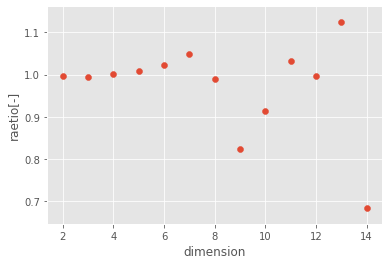

In [22]:
df = pd.DataFrame.from_dict(accept_dict, orient="index")

plt.scatter(df.index, df[0])
plt.xlabel("dimension")
plt.ylabel("raetio[-]")

## N次元の球の体積は収束していく

3.141592653589793
4.188790204786391
4.934802200544679
5.263789013914324
5.167712780049969
4.724765970331401
4.058712126416768
3.2985089027387064
2.550164039877345
1.8841038793898999
1.3352627688545893
0.9106287547832829
0.5992645293207919
[3.141592653589793, 4.188790204786391, 4.934802200544679, 5.263789013914324, 5.167712780049969, 4.724765970331401, 4.058712126416768, 3.2985089027387064, 2.550164039877345, 1.8841038793898999, 1.3352627688545893, 0.9106287547832829, 0.5992645293207919]


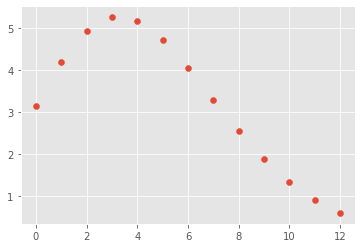

In [36]:
# N次元球の体積
Ndims = 15
# ball_volumes = np.array([])
ball_volumes = []
for Ndim in range(2, Ndims):
    ball_volume = calc_ball_volume(Ndim)
    print(ball_volume)
#     np.append(ball_volumes, ball_volume)
#     np.insert(ball_volumes, ball_volumes.shape[0], ball_volume)
    ball_volumes.append(ball_volume)
print(ball_volumes)

df = pd.DataFrame(ball_volumes)
plt.scatter(df.index, df[0])
plt.show()

## N次元の超格子の体積は発散していく

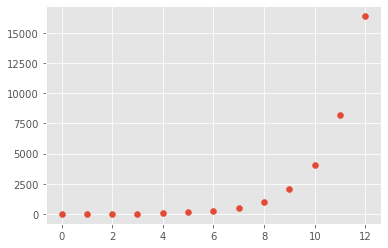

In [37]:
# N次元の超格子の体積
Ndim = 15
super_lattice_volumes = []
for Ndim in range(2, Ndims):
    super_lattice_volume = calc_super_lattice_volume(Ndim)
    super_lattice_volumes.append(super_lattice_volume)

df = pd.DataFrame(super_lattice_volumes)
plt.scatter(df.index, df[0])
plt.show()

In [9]:
# 3次元
NMCS = 40000

Ndim = 3
accept = 0
for i in range(NMCS):
    # xの座標を取得
    x = 2 * np.random.rand(Ndim) - 1.0
    # N次元のxの原点からの距離を計算
    # 全部のベクトルを2乗して和を取ってルートを取る
    r = (np.sum(x**2)) ** 0.5
    # 取得した点の距離が原点から1以下かを判定
    if r <= 1:
        # 1以下の場合は受領
        accept +=1
accept_ratio = accept / NMCS

# 解析解（超格子の体積）
analytical = np.pi **(Ndim/2.0) / (2 ** Ndim * gamma(Ndim /2 + 1))

print("accept_ratio: ", accept_ratio)
print("analytical solution: ", analytical)

accept_dict.update({Ndim:accept_ratio / analytical})
print(accept_dict)

accept_ratio:  0.52365
analytical solution:  0.5235987755982989
{2: 1.0006707891959827, 3: 1.0000978314008517}
